In [1]:
!pip install kaggle
!pip install imbalanced-learn
import imblearn

In [2]:
import kaggle
import zipfile
import os


kaggle.api.authenticate() 

# Download the Dataset
dataset_id = 'mlg-ulb/creditcardfraud' 
download_path = r'C:\Users\aliab\.kaggle' 

kaggle.api.dataset_download_files(
    dataset_id, 
    path=download_path, 
    unzip=True # Automatically unzip the downloaded file
)


import pandas as pd

df = pd.read_csv(os.path.join(download_path, 'creditcard.csv')) 
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.7982

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

## Preprocessing:

In [6]:
def preprocessing(df):
    missing_values = df.isnull().sum()
    print(f'The dataset contains {missing_values} null values')
    print(f'The dataset contains {df.shape}')
    duplicated = df.duplicated().sum()
    print(f'The dataset contains {duplicated} duplicated values ')

In [7]:
print(preprocessing(df))

The dataset contains Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 null values
The dataset contains (284807, 31)
The dataset contains 1081 duplicated values 
None


In [8]:
# Determine the number and percentage of fraudulent and legitimate transactions 
legi_vs_fraud = df['Class'].value_counts()
print(legi_vs_fraud)
print(legi_vs_fraud/284807*100) # 284807 refers to the number of entries/rows

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


Class = 0 refers to legitimate transactions while Class = 1 refers to fraudulent transactions

### We can see that the dataset is very imbalanced where only a small amount of values are classified as fraudulent 0.17%

### Visualizing the Amount feature seperated by the Class feature:

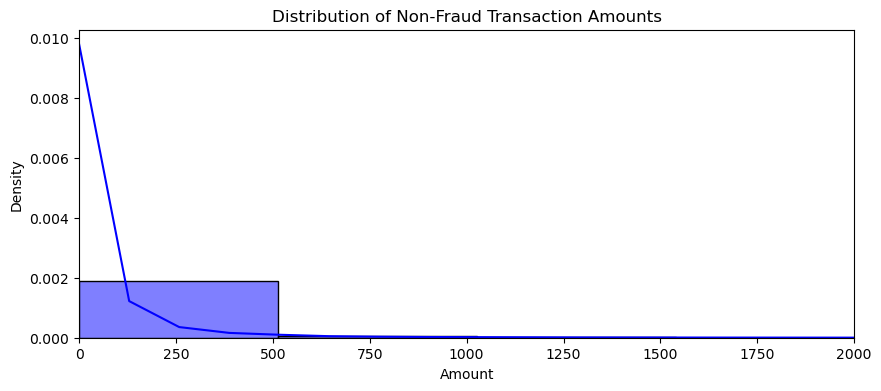

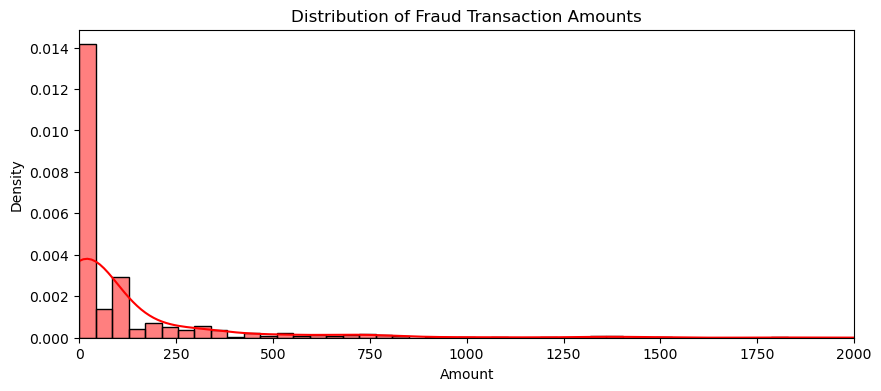

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Separate the two classes into their own DataFrames
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Plot 1: Non-Fraud Amounts
plt.figure(figsize=(10, 4))
sns.histplot(non_fraud['Amount'], bins=50, kde=True, color='blue', stat='density')
plt.title('Distribution of Non-Fraud Transaction Amounts')
plt.xlim([0, 2000]) # Limit X-axis for better visibility of common amounts
plt.show()

# Plot 2: Fraud Amounts
plt.figure(figsize=(10, 4))
sns.histplot(fraud['Amount'], bins=50, kde=True, color='red', stat='density')
plt.title('Distribution of Fraud Transaction Amounts')
plt.xlim([0, 2000]) # Use the same X-limit for direct comparison
plt.show()

### It is evident that the amounts of fraudulent transactions primarily fall within the lower range. Therefore, we can state that fraudulent transactions evade very large sums.

## Feature Engineering:

In [10]:
## We need to convert the time column into a more meaningful thing, lets convert it to hour of day
# Convert the 'Time' column to float type explicitly
df['Time'] = df['Time'].astype('float64')

# Calculate
df['Hour'] = (df['Time'] / 3600.0) % 24

# Drop the original 'Time' column
df.drop('Time', axis=1, inplace=True)

# Check the results.
print("DataFrame Head with Correct Hour Feature:")
print(df['Hour'].head(10)) 
print(f"Max Hour value: {df['Hour'].max():.2f}")

DataFrame Head with Correct Hour Feature:
0    0.000000
1    0.000000
2    0.000278
3    0.000278
4    0.000556
5    0.000556
6    0.001111
7    0.001944
8    0.001944
9    0.002500
Name: Hour, dtype: float64
Max Hour value: 24.00


In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


In [12]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Hour'],
      dtype='object')

## Handling Imabalanced Data Using SMOTE:

In [13]:
from sklearn.model_selection import train_test_split

# Identify the features to be used
X = df.drop('Class', axis=1)
y = df['Class']

# train, test, and split the data. We use stratify=y because it is an imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# We use RobustScaler because it is good with outliers
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler and fit X_train and X_test
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_test)

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)


In [16]:
# Check the ratio for the Class feature
counter = Counter(y_resampled)
print(counter)

Counter({0: 227451, 1: 227451})


### Using SMOTE, we can clearly see that Class 1 has been resampled with a 50/50 split between the two classes. Now we have a balanced dataset. We can move on to Model Building.

## Model Building:

### We will use a Logistic Regression Model:

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

y_pred = model.predict(X_test_scaled)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



### We must now use the Precision-Recall Curve to find a better threshold that maximizes Precision while keeping Recall at an acceptable level.

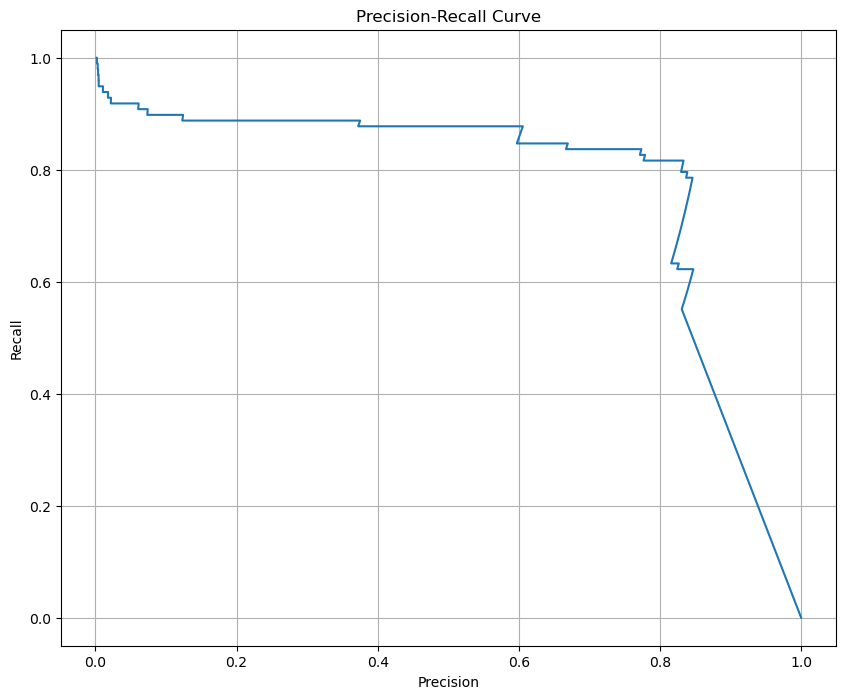

In [20]:
y_scores = model.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize = (10, 8))
plt.plot(precision, recall, label='Logistic Regression')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

### We can see from the curve that the optimal threshold is 0.8 so lets apply it to our model and check the results.

In [23]:
optimal_threshold = 0.8

# If the probability score >= optimal_threshold, the prediction is 1 (Fraud), otherwise 0 (Non-Fraud).
y_pred_final = (y_scores >= optimal_threshold).astype(int)

print('\nClassification Report:')
print(classification_report(y_test, y_pred_final, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.89      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962



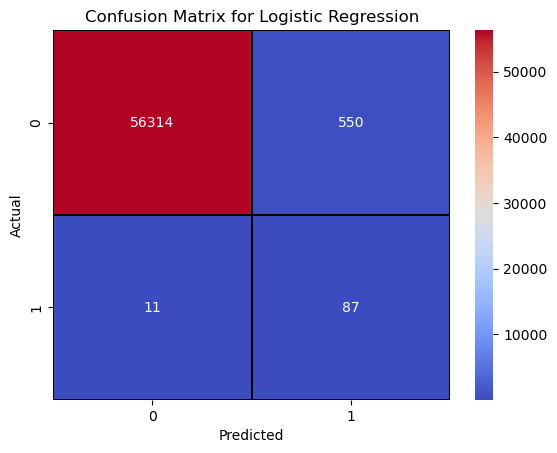

In [40]:
# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_final)

sns.heatmap(conf_mat, annot=True, cmap='coolwarm', linecolor='black', linewidths=0.1, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Conclusion and Reporting:

This project successfully developed and optimized a classification model to detect fraudulent credit card transactions, demonstrating proficiency in handling severe data imbalance and tuning models for specific business objectives.
- **Problem Solved:** Overcame the challenge of a highly imbalanced dataset (only 0.17% fraud cases) using the SMOTE (Synthetic Minority Over-sampling Technique) on the training data.
- **Appropriate Modeling:** Employed Logistic Regression, which provides a highly interpretable model, favored in regulated financial environments.
The final model performance was achieved by adjusting the decision threshold away from the default 0.5 to find an optimal balance between minimizing fraud losses and minimizing customer inconvenience.

The model is a strong baseline that successfully catches 89% of fraud, but the high rate of False Positives (86% of alerts are wrong) means the next step must focus on increasing Precision (reducing false alarms) through better models (like XGBoost) or advanced features.